In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import numpy as np
register_matplotlib_converters()


### Import data

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('time_series.csv')
df.head(5)

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [3]:
len(df)

1304

### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [4]:
# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975)) ]

In [5]:
df['date'] = pd.to_datetime(df['date'])

### Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to `examples/Figure_1.png`. The title should be `Daily freeCodeCamp Forum Page Views 5/2016-12/2019`. The label on the x axis should be `Date` and the label on the y axis should be `Page Views`.

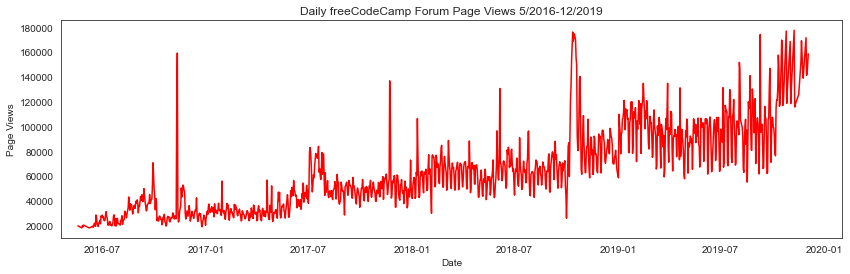

In [32]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from datetime import timedelta

# use the plot function
data1 = df.copy()
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot('date', 'value', data = data1, color="r")

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

datemin = data1['date'].iloc[0]
datemax = data1['date'].iloc[-1]
ax.set_xlim(datemin - timedelta(days=30) , datemax +  timedelta(days=60))

# Adding labels
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

fig.savefig('line_plot.png')

### Create a draw_bar_plot function that draws a bar chart similar to `examples/Figure_2.png`. It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of `Months`. On the chart, the label on the x axis should be `Years` and the label on the y axis should be `Average Page Views`.

In [29]:
# Adding columns 'year' and 'month'
data2 = df.copy()
data2['year'] = data1['date'].dt.year
data2['month'] = data1['date'].dt.month

In [30]:
data2.head(2)

,date,value,year,month
10,2016-05-19,19736,2016,5
17,2016-05-26,18060,2016,5


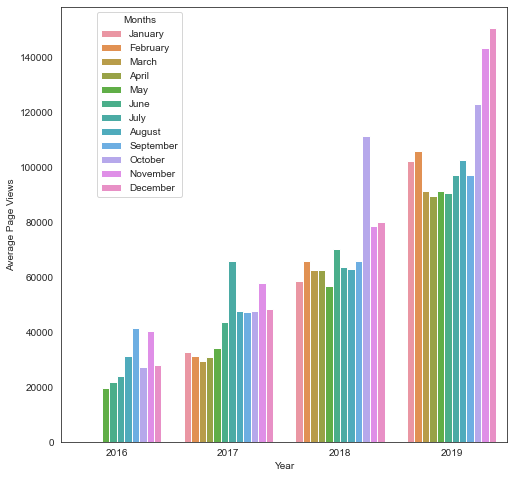

In [40]:
# set plot style: white grid in the background:
#sns.set_style("white")

# Set the figure size
fig, ax = plt.subplots(figsize=(8, 8))

# grouped barplot
#ax.sns.barplot(x="year", y="value", hue="month", data=data2, ci=None);
ax = sns.barplot(x="year", y="value", hue="month", data=data2, ci=None);

# Customize the axes and title
ax.set_ylabel("Average Page Views")
ax.set_xlabel('Year')

# Leyend
ax.legend(bbox_to_anchor= (0.07, 1),
          title="Months",
          labels= ['January','February','March','April','May','June','July','August','September','October','November','December'])

fig.savefig('bar_plot.png')

#### Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to `examples/Figure_3.png`. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be `Year-wise Box Plot (Trend)` and the title of the second chart should be `Month-wise Box Plot (Seasonality)`. Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [12]:
data3 = df.copy()

In [22]:
month_dic = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [14]:
data3 = data3.assign(
    month_char = lambda dataframe: dataframe['month'].map(
        lambda month: month_dic[month]) 
)

In [21]:
data3.head(5)

,date,value,year,month,month_char
10,2016-05-19,19736,2016,5,May
17,2016-05-26,18060,2016,5,May
18,2016-05-27,19997,2016,5,May
19,2016-05-28,19044,2016,5,May
20,2016-05-29,20325,2016,5,May


Text(0.5, 1.0, 'Year-wise Box Plot (Trend)')

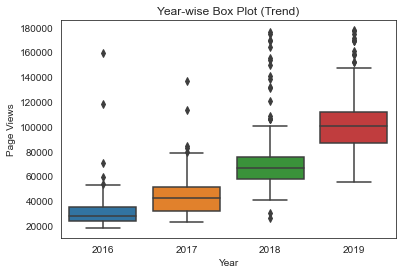

In [27]:
# set plot style: white grid in the background:
sns.set_style("white")

# Set the figure size
plt.figure(figsize=(6, 4))

ax = sns.boxplot(x= 'year', y= 'value', data = data3)

ax.set_ylabel("Page Views")
ax.set_xlabel('Year')
ax.set_title('Year-wise Box Plot (Trend)')

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

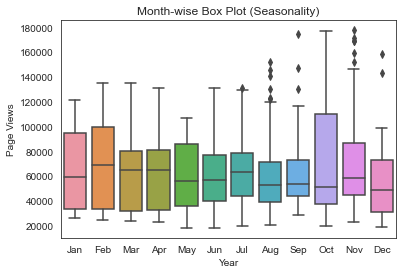

In [28]:
# set plot style: white grid in the background:
sns.set_style("white")

# Set the figure size
plt.figure(figsize=(6, 4))

ax = sns.boxplot(x= 'month_char', y= 'value', order = month_list, data = data3)

ax.set_ylabel("Page Views")
ax.set_xlabel('Year')
ax.set_title('Month-wise Box Plot (Seasonality)')

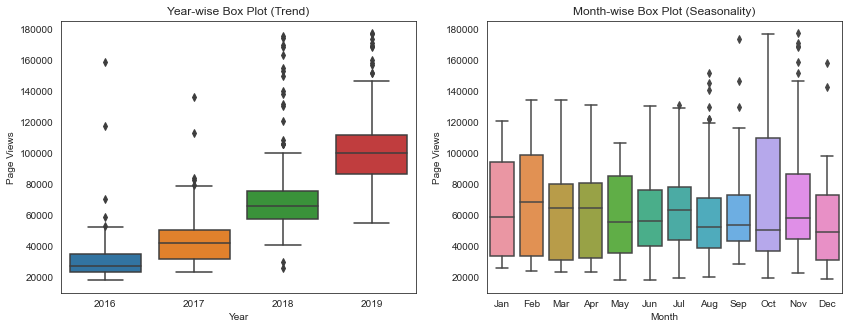

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (14,5))

axes[0] = sns.boxplot(x= 'year', y= 'value', data = data3, ax = axes[0])
axes[0].set_ylabel("Page Views")
axes[0].set_xlabel('Year')
axes[0].set_title('Year-wise Box Plot (Trend)')

axes[1]= sns.boxplot(x= 'month_char', y= 'value', order = month_list, data = data3, ax = axes[1])
axes[1].set_ylabel("Page Views")
axes[1].set_xlabel('Month')
axes[1].set_title('Month-wise Box Plot (Seasonality)')

fig.savefig('box_plot.png')